# Playing with Travel
* In this notebook we explore Driving as a mode of transport against other forms of transport. 
* We begin by converting the travel data into propotions of the overall travel for each Local Authority (LA). 
* We then consider only the LAs where driving makes up less than 50% of the travel. 
___
___
## First let's convert the travel data to proportions 
The sum of each row should be 1. 

In [5]:
%matplotlib inline
from getlds.data import Data
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

df = Data["Travel_2011"].set_index("LA")
#rewrite the travel methods as propotions of the total
df = df.loc[:,"Home":"Other"].apply(lambda x: x / x.sum() , axis = 1)
df["Row_Sum"] = df.sum(axis=1)
df.head()

,Home,Underground,Train,Bus,Taxi,Motorcycle,Drive,Passenger,Bike,Walk,Other,Row_Sum
LA,,,,,,,,,,,,
County Durham,0.090621,0.001417,0.008184,0.060256,0.006148,0.004555,0.643475,0.076185,0.009676,0.094298,0.005187,1.0
Darlington,0.085282,0.000673,0.016893,0.068960,0.008222,0.003897,0.591280,0.068083,0.023483,0.128208,0.005019,1.0
Gateshead,0.069473,0.046475,0.007673,0.151387,0.004931,0.003962,0.546774,0.063454,0.014302,0.086703,0.004865,1.0
Hartlepool,0.065480,0.000874,0.012418,0.067678,0.017820,0.004634,0.605370,0.083591,0.018694,0.113988,0.009453,1.0
Middlesbrough,0.061177,0.000807,0.012796,0.089244,0.016536,0.003575,0.571159,0.085046,0.025208,0.124095,0.010358,1.0


## Only consider LAs where Driving is less than 50%
### Notice that we now only have 52 LAs

In [6]:
# Look at just the data where Driving makes up less than 50% of travel
df = df.query('Drive<0.5')
len(df)

52

___
___
# Scatter Diagrams
* Here we produce 9 scatter diagrams. We include all modes other than "Other"
* The code below looks intimidating but don't worry about the code. 
* Think about what the Scatter Diagrams tell us. 
* What questions do you have about the data?

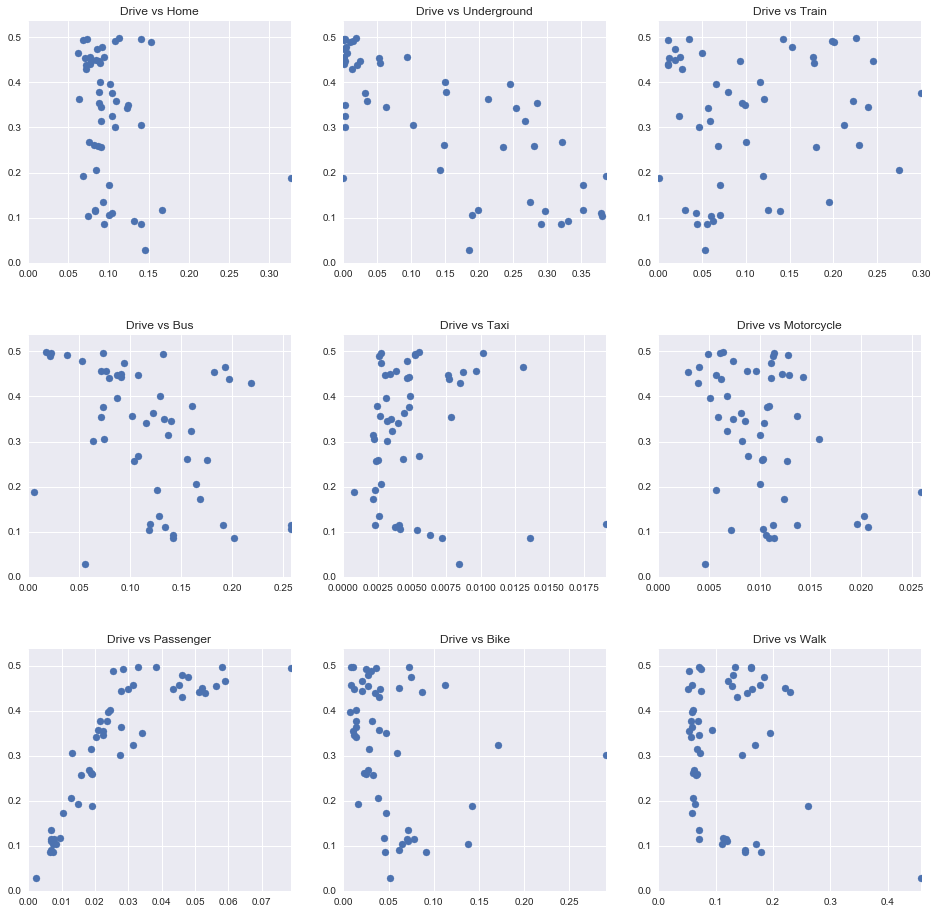

In [13]:
plt.figure(1,figsize = (16,16))
non_drive_modes = [mode for mode in df.axes[1] if mode not in ["Drive","Other","Row_Sum"]]
for i,mode in enumerate(non_drive_modes):
    plt.subplot(3,3,i+1)
    plt.scatter(df[mode],df["Drive"])
    plt.title('Drive vs ' + mode)
    plt.xlim(xmin=0,xmax=max(df[mode]))
    plt.ylim(ymin=0)
    
plt.subplots_adjust(hspace=0.3)

# Extreme LAs
* In this code we find the LAs in the scatter diagram that have the highest proportion of each transport mode other than Driving. 
* Can you identify the LA in each Scatter Diagram?
* Does each LA make sense for the category?

In [12]:
data = {"Mode": non_drive_modes,
        "LA":[df[mode].idxmax() for mode in non_drive_modes], 
        "Values":[df[mode][df[mode].idxmax()] for mode in non_drive_modes]}

pd.DataFrame(data).set_index("Mode")

,LA,Values
Mode,,
Home,Isles of Scilly,0.326468
Underground,Newham,0.385923
Train,Bromley,0.300050
Bus,Hackney,0.257608
Taxi,Kensington and Chelsea,0.019106
Motorcycle,Isles of Scilly,0.025934
Passenger,Leicester,0.078723
Bike,Cambridge,0.290341
Walk,City of London,0.457973
